# Context

Since the dawn of human life on the face of the earth, the global population has been booming. The population was estimated to be 1 billion people in the year 1800. The figure had increased to a new high of 6 billion humans by the turn of the twentieth century. Day in and day out, 227,000 people are being added to the world; it is projected that by the end of the 21st century, the world's population may exceed 11 billion.

As per reports, as a consequence of the unsustainable increase in population and a lack of access to adequate health care, food, and shelter, the number of genetic disorder ailments have increased. Hereditary illnesses are becoming more common due to a lack of understanding about the need for genetic testing. Often kids die as a result of these illnesses, thus genetic testing during pregnancy is critical.

# Task
You are hired as a Machine Learning Engineer from a government agency. You are given a dataset that contains medical information about children who have genetic disorders. Your task is to predict the following:

Genetic disorder

Disorder subclass

#### Importando librerias y datos

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.impute import KNNImputer
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.5f}'.format
plt.style.use('seaborn-whitegrid')
%matplotlib inline


In [13]:
def unistats(df):
    import pandas as pd
    output_df = pd.DataFrame(columns=['Count','Missing','Unique','Dtype','Numeric','Mode','Mean','Min','25%','Median','75%','Max','Std','Skew','Kurt'])
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]) and df[col].dtype !='bool' and pd.isnull(df[col]).all()!=True:
            
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype,pd.api.types.is_numeric_dtype(df[col]),
                                  df[col].mode().values[0], df[col].mean(),df[col].min(), df[col].quantile(0.25), df[col].median(),
                                  df[col].quantile(0.75), df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype,pd.api.types.is_numeric_dtype(df[col]),
                                   '-' if pd.isnull(df[col]).all() else df[col].mode().values[0],'-','-','-','-','-','-','-','-','-']
    return output_df.sort_values(by=['Numeric', 'Skew','Unique'],ascending=False)

In [4]:
ROOT_PATH ='C:\\Users\\Usuario\\Desktop\\Proyecto Final\\src'

TRAIN_PATH = ROOT_PATH + '\\data\\raw\\train.csv'
TEST_PATH = ROOT_PATH + "\\data\\raw\\test.csv"

In [5]:
train_data = pd.read_csv(TRAIN_PATH)
test_data = pd.read_csv(TEST_PATH)
df_train = train_data.copy()
df_test = test_data.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

## Información detallada de las columnas

#### Explicación de las columnas de importancia para el modelo

* Genes in mother's side:

Represent a gene defect in a patient's mother

* Inherited from father:

Represent a gene defect in a patient's father

* Paternal gene:

Represent a gene defect in a patient's paternal side of the family

* Respiratory Rate(breaths/min):

Represents a patient's respiratory breating rate

* Heart Rate (rates/min):

Represents a patient's heart rate

* Parental Consent:

Represents whether a patient's parents approved the treatment plan

* Follow-up:

Represents a patient's level of risk (how intense their condition is)

* Folic acid details (peri-conceptional):

Represents the periconceptional folic acid supplementation details of a patient

* H/O serious maternal illness:

Represents an unexpected outcome of labor and delivery that resulted in significant short or long term consequences to a patient's mother

* H/O radiation exposure (x-ray):

Represents whether a patient has any radiation exposure history

* H/O substance abuse:

Represents whether a parent has a history of drug addiction

* Assisted conception:

Represents the type of treatment used for infertility

* Birth defects:

Represents whether a patient has birth defects


* El resto no tienen información suficiente para su uso

## Eliminando columnas innecesarias

In [6]:
#Eliminando columnas innecesarias ya sea por falta de información o por no tener ninuna relevancia en un modelo de ML
df_train.drop(["Patient Id","Patient First Name","Family Name","Father's name","Location of Institute",
          "Institute Name","Test 1","Test 2","Test 3","Test 4","Test 5","Symptom 1","Symptom 2",
           "Symptom 3","Symptom 4","Symptom 5"],inplace=True,axis=1)

In [7]:
#Eliminando columnas innecesarias ya sea por falta de información o por no tener ninuna relevancia en un modelo de ML
df_test.drop(["Patient Id","Patient First Name","Family Name","Father's name","Location of Institute",
          "Institute Name","Test 1","Test 2","Test 3","Test 4","Test 5","Symptom 1","Symptom 2",
           "Symptom 3","Symptom 4","Symptom 5"],inplace=True,axis=1)

## Cambiando nombre de las variables

In [8]:
df_train.rename(columns={"Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Inherited from father":"Inherited_from_Father",    
                    "Paternal gene":"Paternal_Gene",
                    'Maternal gene':"Maternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Parental consent":"Parental_Consent",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Place_Birth",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass"},inplace=True)

In [21]:
df_test.rename(columns={"Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Inherited from father":"Inherited_from_Father",
                    "Paternal gene":"Paternal_Gene",
                    'Maternal gene':"Maternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Parental consent":"Parental_Consent",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Place_Birth",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell",
                    "Blood test result":"Blood_Test_Result"},inplace=True)

In [1580]:
#Create a Pandas Profiling report to get a quick grasp of the data
reporteEdadsucio = pp.ProfileReport(df_train)

if not os.path.exists('raw_data'):
    os.makedirs('raw_data')

reporteEdadsucio.to_file("raw_data/AnalysisUncleanData.html")    

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Entradas vacias en mi dataset

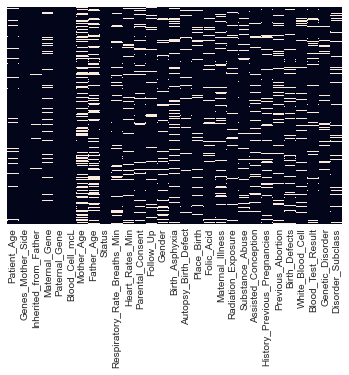

In [1425]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False);

In [1426]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(45)

,Total,Percent
Mother_Age,6036,0.27333
Father_Age,5986,0.27107
Maternal_Gene,2810,0.12725
Substance_Abuse,2195,0.09940
Gender,2173,0.09840
History_Previous_Pregnancies,2172,0.09836
Disorder_Subclass,2168,0.09818
Follow_Up,2166,0.09808
Previous_Abortion,2162,0.09790
Birth_Defects,2154,0.09754


In [1427]:
for column in df_train:
    columnSeriesObj = df_train[column]
    print('Column Name : ', column)
    print('Column Contents : ', columnSeriesObj.unique())
    print('------------------------------------------')

Column Name :  Patient_Age
Column Contents :  [ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]
------------------------------------------
Column Name :  Genes_Mother_Side
Column Contents :  ['Yes' 'No']
------------------------------------------
Column Name :  Inherited_from_Father
Column Contents :  ['No' 'Yes' nan]
------------------------------------------
Column Name :  Maternal_Gene
Column Contents :  ['Yes' 'No' nan]
------------------------------------------
Column Name :  Paternal_Gene
Column Contents :  ['No' 'Yes']
------------------------------------------
Column Name :  Blood_Cell_mcL
Column Contents :  [4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
------------------------------------------
Column Name :  Mother_Age
Column Contents :  [nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]
------------------------------------------
Column Name : 

In [1428]:
for column in df_test:
    columnSeriesObj = df_test[column]
    print('Column Name : ', column)
    print('Column Contents : ', columnSeriesObj.unique())
    print('------------------------------------------')

Column Name :  Patient_Age
Column Contents :  [ 6 10  5 13  9  4 12  3  1  0 14  8  2 11  7]
------------------------------------------
Column Name :  Genes_Mother_Side
Column Contents :  ['No' 'Yes']
------------------------------------------
Column Name :  Inherited_from_Father
Column Contents :  ['Yes' 'No' nan]
------------------------------------------
Column Name :  Maternal_Gene
Column Contents :  ['No' nan 'Yes']
------------------------------------------
Column Name :  Paternal_Gene
Column Contents :  ['No' 'Yes']
------------------------------------------
Column Name :  Blood_Cell_mcL
Column Contents :  [4.98165485 5.11888952 4.87620391 ... 4.89835233 4.80483966 5.42123643]
------------------------------------------
Column Name :  Mother_Age
Column Contents :  [38 33 48 25 41 27 19 37 28 39 49 40 22 21 46 24 30 47 20 42 35 36 51 50
 45 34 44 43 32 26 31 18 23 29]
------------------------------------------
Column Name :  Father_Age
Column Contents :  [61 53 60 55 38 25 22 24 5

In [16]:
df_train.columns

Index(['Patient_Age', 'Genes_Mother_Side', 'Inherited_from_Father',
       'Maternal_Gene', 'Paternal_Gene', 'Blood_Cell_mcL', 'Mother_Age',
       'Father_Age', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates_Min', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Place_Birth', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Previous_Pregnancies',
       'Previous_Abortion', 'Birth_Defects', 'White_Blood_Cell',
       'Blood_Test_Result', 'Genetic_Disorder', 'Disorder_Subclass'],
      dtype='object')

In [17]:
unistats(df_train)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Blood_Cell_mcL,22083,0,22083,float64,True,4.09273,4.89887,4.09273,4.76311,4.89940,5.03383,5.60983,0.19966,0.01002,-0.06282
Patient_Age,20656,1427,15,float64,True,4.00000,6.97415,0.00000,3.00000,7.00000,11.00000,14.00000,4.31948,0.00951,-1.21560
White_Blood_Cell,19935,2148,17277,float64,True,3.00000,7.48622,3.00000,5.42470,7.47713,9.52615,12.00000,2.65339,0.00664,-0.97450
Previous_Abortion,19921,2162,5,float64,True,2.00000,2.00306,0.00000,1.00000,2.00000,3.00000,4.00000,1.41192,-0.00103,-1.29036
Mother_Age,16047,6036,34,float64,True,23.00000,34.52645,18.00000,26.00000,35.00000,43.00000,51.00000,9.85260,-0.00515,-1.22309
Father_Age,16097,5986,45,float64,True,20.00000,41.97285,20.00000,31.00000,42.00000,53.00000,64.00000,13.03550,-0.00584,-1.21386
Disorder_Subclass,19915,2168,9,object,False,Leigh syndrome,-,-,-,-,-,-,-,-,-
Birth_Asphyxia,19944,2139,4,object,False,Yes,-,-,-,-,-,-,-,-,-
Autopsy_Birth_Defect,21057,1026,4,object,False,Not applicable,-,-,-,-,-,-,-,-,-
Radiation_Exposure,19930,2153,4,object,False,Not applicable,-,-,-,-,-,-,-,-,-


## Análisis Univariante

### Patient Age (KNN)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Patient_Age,20656,1427,15,float64,True,4.00000,6.97415,0.00000,3.00000,7.00000,11.00000,14.00000,4.31948,0.00951,-1.21560


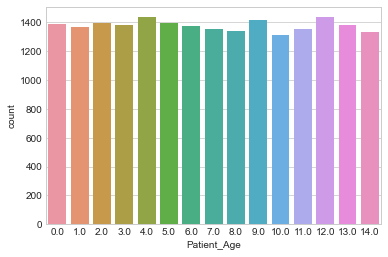

In [1431]:
sns.countplot(df_train['Patient_Age']);
unistats(df_train[['Patient_Age']])

In [1432]:
unistats(df_test[['Patient_Age']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Patient_Age,9465,0,15,int64,True,14,7.04184,0,3.00000,7.00000,11.00000,14,4.33799,-0.00609,-1.20283


In [1433]:
df_test['Patient_Age'].value_counts()

14    692
4     669
0     647
10    647
6     642
7     636
9     632
13    627
1     623
8     621
11    619
5     618
2     601
12    601
3     590
Name: Patient_Age, dtype: int64

### No. of previous abortion

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Previous_Abortion,19921,2162,5,float64,True,2.00000,2.00306,0.00000,1.00000,2.00000,3.00000,4.00000,1.41192,-0.00103,-1.29036


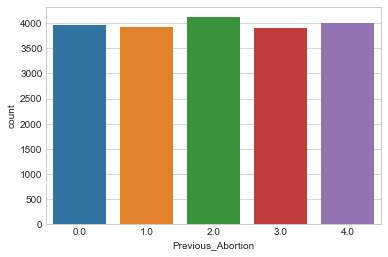

In [1434]:
sns.countplot(df_train['Previous_Abortion']);
unistats(df_train[['Previous_Abortion']])

In [1435]:
df_train['Previous_Abortion']

0           NaN
1           NaN
2       4.00000
3       1.00000
4       4.00000
          ...  
22078   3.00000
22079   2.00000
22080   2.00000
22081   1.00000
22082   4.00000
Name: Previous_Abortion, Length: 22083, dtype: float64

In [1436]:
df_train['Previous_Abortion'].fillna(np.ceil(df_train.groupby(['Patient_Age',"Disorder_Subclass"])['Previous_Abortion'].transform("mean")), inplace=True)

In [1437]:
unistats(df_train[['Previous_Abortion']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Previous_Abortion,21602,481,5,float64,True,2.00000,2.04064,0.00000,1.00000,2.00000,3.00000,4.00000,1.36918,-0.06871,-1.20328


In [1438]:
df_train['Previous_Abortion'].fillna(np.ceil(df_train.groupby(["Disorder_Subclass"])['Previous_Abortion'].transform("mean")), inplace=True)

In [1439]:
unistats(df_train[['Previous_Abortion']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Previous_Abortion,21756,327,5,float64,True,2.00000,2.04633,0.00000,1.00000,2.00000,3.00000,4.00000,1.36633,-0.07907,-1.19839


In [1440]:
df_train['Previous_Abortion'].fillna(df_train['Previous_Abortion'].mode()[0],inplace = True)

In [1441]:
unistats(df_train[['Previous_Abortion']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Previous_Abortion,22083,0,5,float64,True,2.00000,2.04565,0.00000,1.00000,2.00000,3.00000,4.00000,1.35618,-0.07814,-1.17153


In [1442]:
unistats(df_test[['Previous_Abortion']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Previous_Abortion,9465,0,6,int64,True,-99,-20.35288,-99,0.00000,1.00000,3.00000,4,41.96505,-1.33875,-0.20271


In [1443]:
df_test['Previous_Abortion'].value_counts()

-99    2096
 3     1521
 2     1498
 4     1468
 0     1449
 1     1433
Name: Previous_Abortion, dtype: int64

In [1444]:
df_test['Previous_Abortion'].replace(-99,df_train['Previous_Abortion'].mode()[0],inplace=True)

In [1445]:
df_test['Previous_Abortion'].value_counts()

2.00000    3594
3.00000    1521
4.00000    1468
0.00000    1449
1.00000    1433
Name: Previous_Abortion, dtype: int64

### Mother_Age

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Mother_Age,16047,6036,34,float64,True,23.00000,34.52645,18.00000,26.00000,35.00000,43.00000,51.00000,9.85260,-0.00515,-1.22309


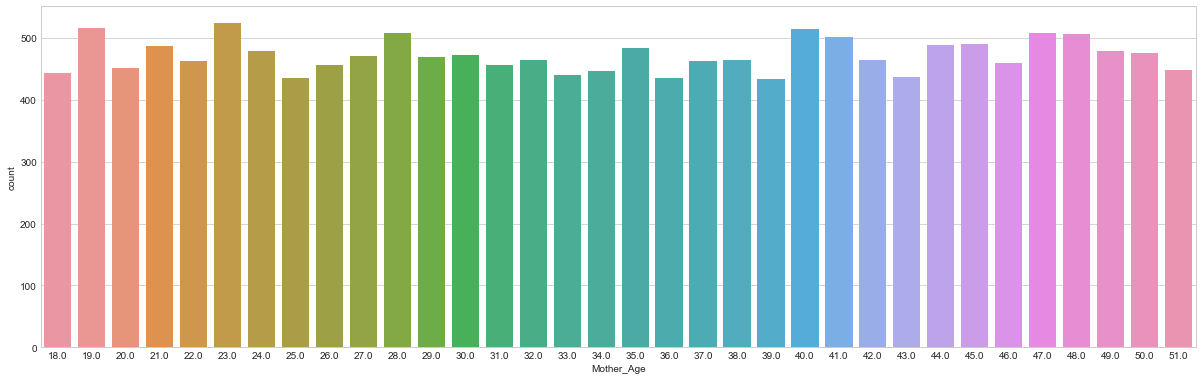

In [1446]:
dims = (20.7, 6.27)
fig, ax = plt.subplots(figsize=dims)

sns.countplot(df_train['Mother_Age'],ax = ax);
unistats(df_train[['Mother_Age']])

In [1447]:
df_train["Mother_Age"].fillna(np.floor(df_train["Mother_Age"].mean()), inplace=True)

In [1448]:
unistats(df_test[["Mother_Age"]])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Mother_Age,9465,0,34,int64,True,33,34.57549,18,26.00000,35.00000,43.00000,51,9.83487,-0.01327,-1.20523


### Father Age

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Father_Age,16097,5986,45,float64,True,20.00000,41.97285,20.00000,31.00000,42.00000,53.00000,64.00000,13.03550,-0.00584,-1.21386


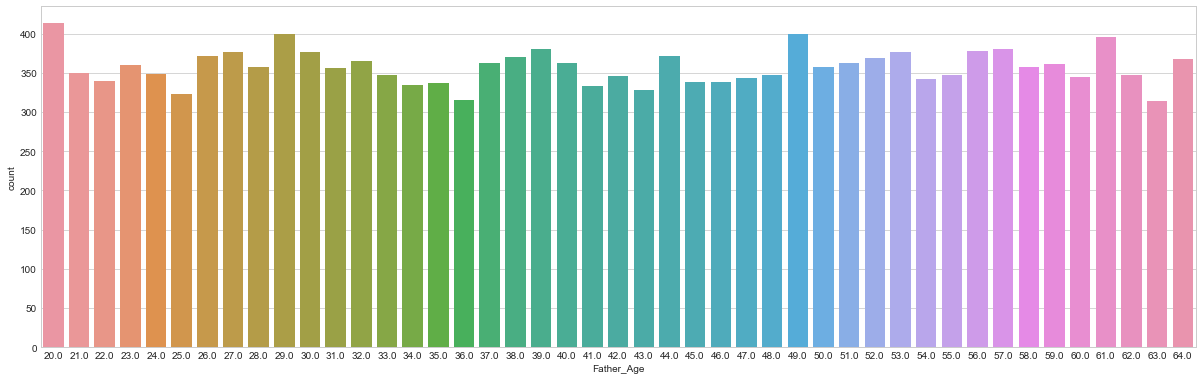

In [1449]:
dims = (20.7, 6.27)
fig, ax = plt.subplots(figsize=dims)

sns.countplot(df_train['Father_Age'],ax = ax);
unistats(df_train[['Father_Age']])

In [1450]:
df_train["Father_Age"].fillna(np.floor(df_train["Father_Age"].mean()), inplace=True)

In [1451]:
unistats(df_test[['Father_Age']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Father_Age,9465,0,45,int64,True,29,41.83074,20,30.00000,42.00000,53.00000,64,13.04094,0.01887,-1.21177


## White_Blood_Cell

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
White_Blood_Cell,19935,2148,17277,float64,True,3.00000,7.48622,3.00000,5.42470,7.47713,9.52615,12.00000,2.65339,0.00664,-0.97450


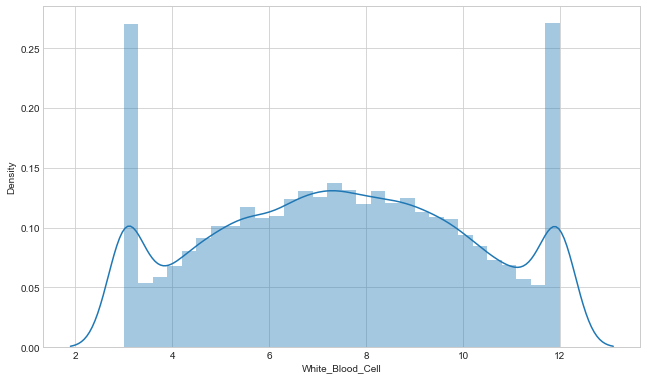

In [1452]:
dims = (10.7, 6.27)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(df_train['White_Blood_Cell'],ax = ax);
unistats(df_train[['White_Blood_Cell']])

In [1453]:
df_train["White_Blood_Cell"].fillna(df_train["White_Blood_Cell"].mean(), inplace=True)

In [1454]:
unistats(df_test[['White_Blood_Cell']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
White_Blood_Cell,9465,0,6378,float64,True,-99.00000,-16.15562,-99.00000,3.00000,6.35971,8.89611,12.00000,44.32848,-1.32741,-0.22191


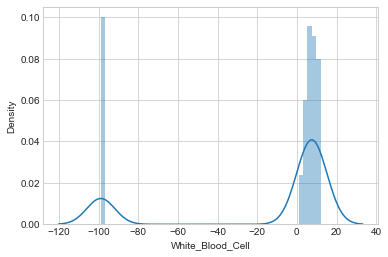

In [1455]:
sns.distplot(df_test['White_Blood_Cell']);

In [1456]:
df_test["White_Blood_Cell"].replace(-99.00000,df_train["White_Blood_Cell"].mean(), inplace=True)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
White_Blood_Cell,9465,0,6378,float64,True,7.48622,7.49298,3.00000,6.07852,7.48622,8.89611,12.00000,2.34378,0.03056,-0.40035


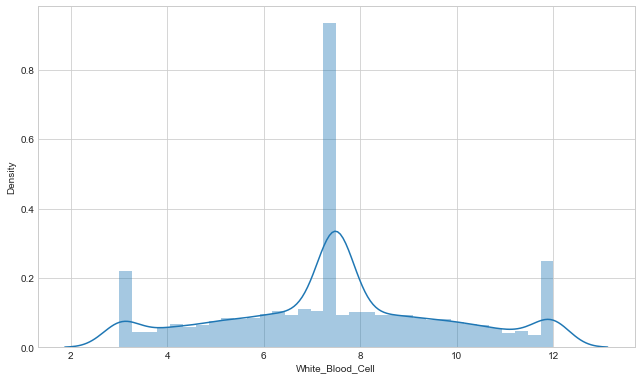

In [1457]:
dims = (10.7, 6.27)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(df_test['White_Blood_Cell'],ax=ax);
unistats(df_test[['White_Blood_Cell']])

## Blood_Cell_mcL

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Blood_Cell_mcL,22083,0,22083,float64,True,4.09273,4.89887,4.09273,4.76311,4.89940,5.03383,5.60983,0.19966,0.01002,-0.06282


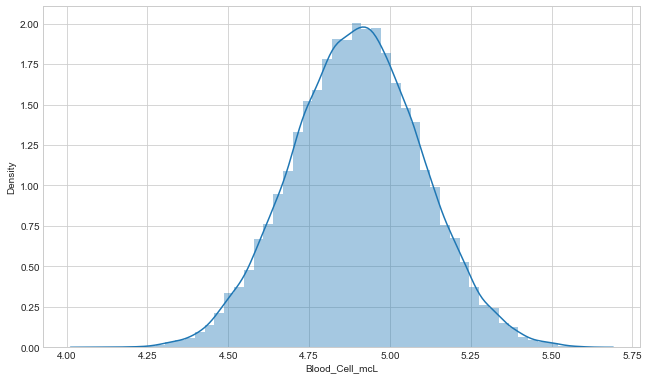

In [1458]:
dims = (10.7, 6.27)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(df_train['Blood_Cell_mcL'],ax = ax);
unistats(df_train[['Blood_Cell_mcL']])

In [1459]:
unistats(df_test[['Blood_Cell_mcL']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Blood_Cell_mcL,9465,0,9465,float64,True,4.12047,4.90021,4.12047,4.76584,4.89895,5.03316,5.67618,0.19916,0.00058,0.02419


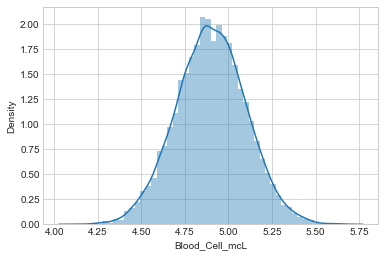

In [1460]:
sns.distplot(df_test['Blood_Cell_mcL']);

### Assisted conception IVF/ART

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Assisted_Conception,19961,2122,2,object,False,Yes,-,-,-,-,-,-,-,-,-


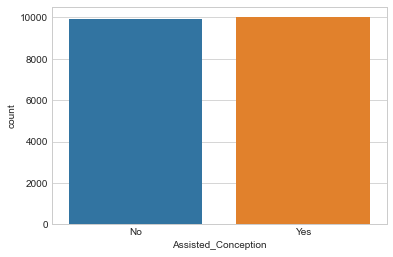

In [1461]:
sns.countplot(df_train['Assisted_Conception']);
unistats(df_train[['Assisted_Conception']])

In [1462]:
df_train["Assisted_Conception"].fillna(df_train["Assisted_Conception"].mode()[0], inplace=True)
unistats(pd.DataFrame(df_train['Assisted_Conception']))

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Assisted_Conception,22083,0,2,object,False,Yes,-,-,-,-,-,-,-,-,-


In [1463]:
unistats(df_test[['Assisted_Conception']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Assisted_Conception,9465,0,3,object,False,No,-,-,-,-,-,-,-,-,-


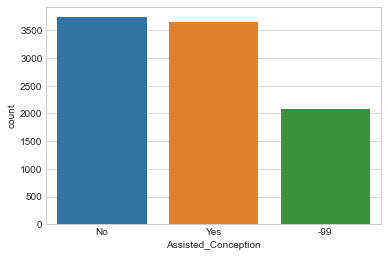

In [1464]:
sns.countplot(df_test['Assisted_Conception']);

In [1465]:
df_test['Assisted_Conception'] = df_test['Assisted_Conception'] .replace('-99',df_train["Assisted_Conception"].mode()[0])

In [1466]:
df_test['Assisted_Conception'].unique()

array(['No', 'Yes'], dtype=object)

### Place of birth

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Place_Birth,19959,2124,2,object,False,Institute,-,-,-,-,-,-,-,-,-


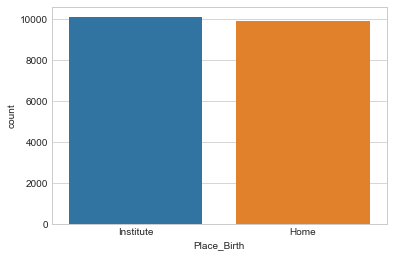

In [1467]:
sns.countplot(df_train['Place_Birth']);
unistats(df_train[['Place_Birth']])

In [1468]:
df_train["Place_Birth"].fillna(df_train["Place_Birth"].mode()[0], inplace=True)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Place_Birth,9465,0,3,object,False,Home,-,-,-,-,-,-,-,-,-


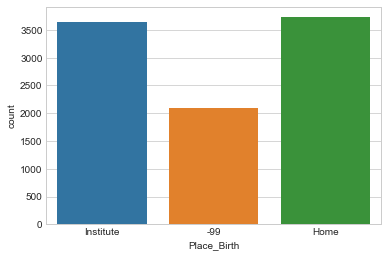

In [1469]:
sns.countplot(df_test['Place_Birth']);
unistats(df_test[['Place_Birth']])

In [1470]:
df_test['Place_Birth'] = df_test['Place_Birth'] .replace('-99',df_train["Place_Birth"].mode()[0])

In [1471]:
df_test['Place_Birth'].unique()

array(['Institute', 'Home'], dtype=object)

### H/O substance abuse

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Substance_Abuse,19888,2195,4,object,False,-,-,-,-,-,-,-,-,-,-


,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Substance_Abuse,19888,2195,4,object,False,-,-,-,-,-,-,-,-,-,-


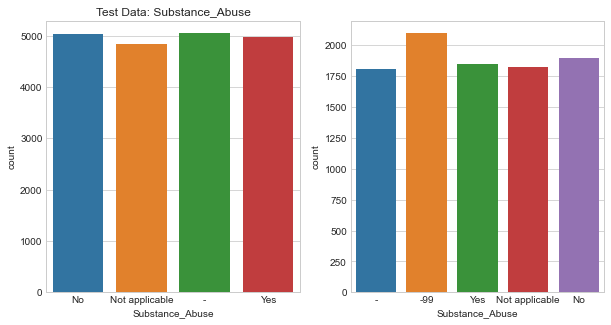

In [31]:
fig, axes = plt.subplots(1, 2,figsize=(10,5))

sns.countplot(df_train['Substance_Abuse'],ax=axes[0], );
axes[0].set_title('Train Data: Substance_Abuse')


sns.countplot(df_test['Substance_Abuse'],ax=axes[1]);
axes[0].set_title('Test Data: Substance_Abuse')

unistats(df_train[['Substance_Abuse']])

In [24]:
unistats(df_test[['Substance_Abuse']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Substance_Abuse,9465,0,5,object,False,-99,-,-,-,-,-,-,-,-,-


In [1473]:
df_train["Substance_Abuse"].replace('-','Not applicable',inplace = True)
df_train['Substance_Abuse'].fillna('Not applicable',inplace = True)

In [1476]:
df_test["Substance_Abuse"].replace('-','Not applicable',inplace = True)
df_test['Substance_Abuse'].replace('-99','No',inplace = True)

In [1474]:
df_train['Substance_Abuse'].value_counts()

Not applicable    12075
No                 5033
Yes                4975
Name: Substance_Abuse, dtype: int64

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Substance_Abuse,9465,0,5,object,False,-99,-,-,-,-,-,-,-,-,-


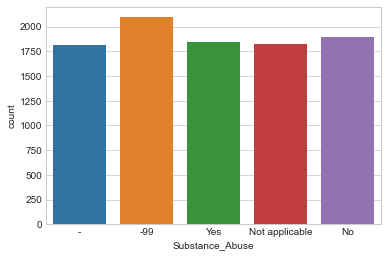

In [1475]:
sns.countplot(df_test['Substance_Abuse']);
unistats(df_test[['Substance_Abuse']])

In [1477]:
df_test['Substance_Abuse'].value_counts()

No                3989
Not applicable    3631
Yes               1845
Name: Substance_Abuse, dtype: int64

### H/O radiation exposure (x-ray)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Radiation_Exposure,19930,2153,4,object,False,Not applicable,-,-,-,-,-,-,-,-,-


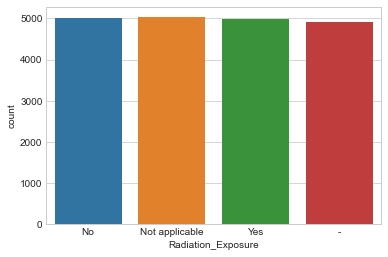

In [1478]:
sns.countplot(df_train['Radiation_Exposure']);
unistats(df_train[['Radiation_Exposure']])

In [1479]:
df_train["Radiation_Exposure"].replace('-','Not applicable',inplace = True)
df_train['Radiation_Exposure'].fillna('Not applicable',inplace = True)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Radiation_Exposure,9465,0,5,object,False,-99,-,-,-,-,-,-,-,-,-


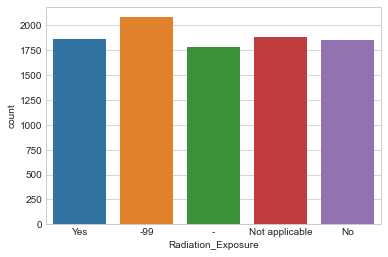

In [1480]:
sns.countplot(df_test['Radiation_Exposure']);
unistats(df_test[['Radiation_Exposure']])

In [1481]:
df_test["Radiation_Exposure"].replace('-','Not applicable',inplace = True)
df_test['Radiation_Exposure'].replace('-99','No',inplace = True)

In [1482]:
df_test['Radiation_Exposure'].value_counts()

No                3936
Not applicable    3666
Yes               1863
Name: Radiation_Exposure, dtype: int64

### H/O serious maternal illness

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Maternal_Illness,19931,2152,2,object,False,No,-,-,-,-,-,-,-,-,-


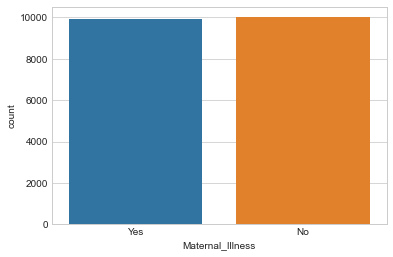

In [1483]:
sns.countplot(df_train['Maternal_Illness']);
unistats(df_train[['Maternal_Illness']])

In [1484]:
df_train["Maternal_Illness"].fillna(df_train["Maternal_Illness"].mode()[0], inplace=True)

In [1485]:
unistats(df_test[['Maternal_Illness']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Maternal_Illness,9465,0,3,object,False,Yes,-,-,-,-,-,-,-,-,-


In [1486]:
df_test['Maternal_Illness'].value_counts()

Yes    3695
No     3690
-99    2080
Name: Maternal_Illness, dtype: int64

In [1487]:
df_test['Maternal_Illness'] .replace('-99',df_train["Maternal_Illness"].mode()[0], inplace = True)

In [1488]:
df_test['Maternal_Illness'].value_counts()

No     5770
Yes    3695
Name: Maternal_Illness, dtype: int64

### Genes in mother's side

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Genes_Mother_Side,22083,0,2,object,False,Yes,-,-,-,-,-,-,-,-,-


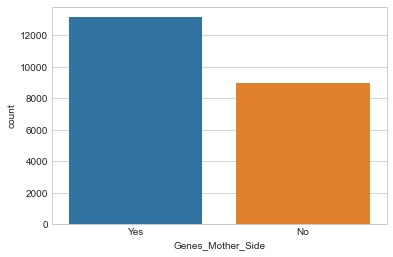

In [1489]:
sns.countplot(df_train['Genes_Mother_Side']);
unistats(df_train[['Genes_Mother_Side']])

In [1490]:
print(df_test['Genes_Mother_Side'].value_counts())
unistats(df_test[['Genes_Mother_Side']])

Yes    5739
No     3726
Name: Genes_Mother_Side, dtype: int64


,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Genes_Mother_Side,9465,0,2,object,False,Yes,-,-,-,-,-,-,-,-,-


### Inherited from father

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Inherited_from_Father,21777,306,2,object,False,No,-,-,-,-,-,-,-,-,-


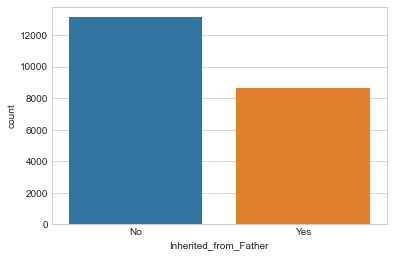

In [1491]:
sns.countplot(df_train['Inherited_from_Father']);
unistats(df_train[['Inherited_from_Father']])

In [1492]:
df_train["Inherited_from_Father"].fillna(df_train["Inherited_from_Father"].mode()[0], inplace=True)

In [1493]:
unistats(pd.DataFrame(df_test['Inherited_from_Father']))

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Inherited_from_Father,8914,551,2,object,False,No,-,-,-,-,-,-,-,-,-


In [1494]:
df_test["Inherited_from_Father"].fillna(df_train["Inherited_from_Father"].mode()[0], inplace=True)

### Maternal gene

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Maternal_Gene,19273,2810,2,object,False,Yes,-,-,-,-,-,-,-,-,-


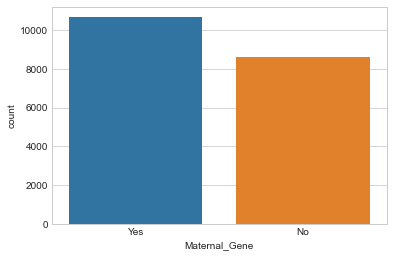

In [1495]:
sns.countplot(df_train['Maternal_Gene']);
unistats(df_train[['Maternal_Gene']])

In [1496]:
df_train["Maternal_Gene"].fillna(df_train["Maternal_Gene"].mode()[0], inplace=True)

In [1497]:
unistats(df_test[['Maternal_Gene']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Maternal_Gene,5742,3723,2,object,False,Yes,-,-,-,-,-,-,-,-,-


In [1498]:
df_test["Maternal_Gene"].fillna(df_train["Maternal_Gene"].mode()[0], inplace=True)

### Paternal gene

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Paternal_Gene,22083,0,2,object,False,No,-,-,-,-,-,-,-,-,-


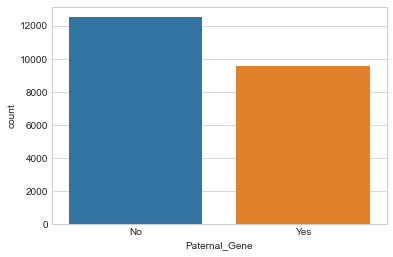

In [1499]:
sns.countplot(df_train['Paternal_Gene']);
unistats(df_train[['Paternal_Gene']])

In [1500]:
unistats(df_test[['Paternal_Gene']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Paternal_Gene,9465,0,2,object,False,No,-,-,-,-,-,-,-,-,-


### Status

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Status,22083,0,2,object,False,Alive,-,-,-,-,-,-,-,-,-


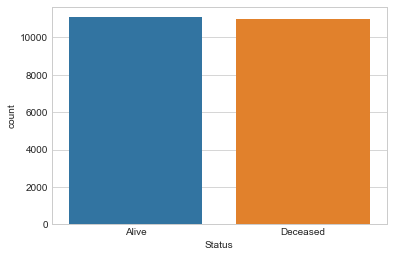

In [1501]:
sns.countplot(df_train['Status']);
unistats(pd.DataFrame(df_train['Status']))

In [1502]:
unistats(pd.DataFrame(df_test['Status']))

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Status,9465,0,2,object,False,Deceased,-,-,-,-,-,-,-,-,-


### Parental consent (variable poco importante será eliminada)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Parental_Consent,19958,2125,1,object,False,Yes,-,-,-,-,-,-,-,-,-


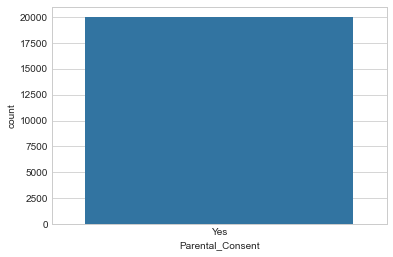

In [1503]:
sns.countplot(df_train['Parental_Consent']);
unistats(df_train[['Parental_Consent']])

In [1504]:
unistats(df_test[['Parental_Consent']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Parental_Consent,9465,0,2,object,False,Yes,-,-,-,-,-,-,-,-,-


In [1505]:
df_test['Parental_Consent'].value_counts()

Yes    7370
-99    2095
Name: Parental_Consent, dtype: int64

#### Esta variable es eliminada por aportar poca informacion en el modelo

In [1506]:
df_train.drop('Parental_Consent',axis = 1, inplace = True)
df_test.drop('Parental_Consent', axis = 1,inplace = True)

### Follow-up

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Follow_Up,19917,2166,2,object,False,Low,-,-,-,-,-,-,-,-,-


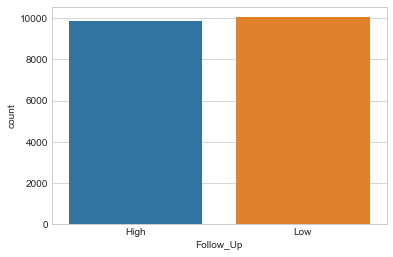

In [1507]:
sns.countplot(df_train['Follow_Up']);
unistats(df_train[['Follow_Up']])

In [1508]:
df_train["Follow_Up"].fillna(df_train["Follow_Up"].mode()[0], inplace=True)

In [1509]:
unistats(df_test[['Follow_Up']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Follow_Up,9465,0,3,object,False,Low,-,-,-,-,-,-,-,-,-


In [1510]:
df_test['Follow_Up'].unique()

array(['Low', 'High', '-99'], dtype=object)

In [1511]:
df_test["Follow_Up"].replace('-99',df_train["Follow_Up"].mode()[0], inplace = True)

In [1512]:
df_test['Follow_Up'].unique()

array(['Low', 'High'], dtype=object)

### Blood test result

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Blood_Test_Result,19938,2145,4,object,False,slightly abnormal,-,-,-,-,-,-,-,-,-


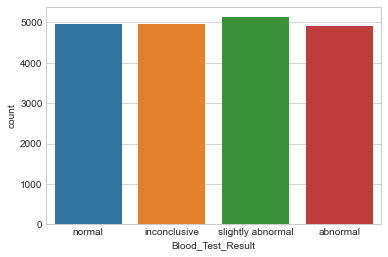

In [1513]:
sns.countplot(df_train['Blood_Test_Result']);
unistats(df_train[['Blood_Test_Result']])

In general, the reference ranges are:

*White blood cells: 4,500 to 11,000 cells per microliter (cells/mcL) 


*Red blood cells: 4.5 million to 5.9 million cells/mcL for men; 4.1 million to 5.1 million cells/mcL for women.


In [1514]:
#De acuerdo a los globulos blancos y lobulos rojos
btrNan = df_train[pd.isnull(df_train["Blood_Test_Result"])]

In [1515]:
mask=(pd.isnull(df_train["Blood_Test_Result"]) & ((btrNan['White_Blood_Cell']<3.45) | (btrNan['White_Blood_Cell']>12)))

df_train.loc[mask,'Blood_Test_Result']=df_train.loc[mask,'Blood_Test_Result'].fillna('abnormal')

In [1516]:
mask=(pd.isnull(df_train["Blood_Test_Result"]) &(((btrNan['White_Blood_Cell']>3.45) & (btrNan['White_Blood_Cell']<3.6)) 
        | (btrNan['White_Blood_Cell']>12)))

df_train.loc[mask,'Blood_Test_Result']=df_train.loc[mask,'Blood_Test_Result'].fillna('slightly abnormal')

In [1517]:
mask =(pd.isnull(df_train["Blood_Test_Result"])&((btrNan['Blood_Test_Result']<3.9) | (btrNan['Blood_Test_Result']>5.25)) & (btrNan['Gender']=='Female'))

df_train.loc[mask,'Blood_Test_Result']=df_train.loc[mask,'Blood_Test_Result'].fillna('abnormal')

In [1518]:
mask =(pd.isnull(df_train["Blood_Test_Result"])&((btrNan['Blood_Test_Result']>=3.9) & (btrNan['Blood_Test_Result']<4.1))| 
                             ((btrNan['Blood_Test_Result']>5.1) & (btrNan['Blood_Test_Result']<=5.25))   
                            & (btrNan['Gender']=='Female'))

df_train.loc[mask,'Blood_Test_Result']=df_train.loc[mask,'Blood_Test_Result'].fillna('slightly abnormal')

In [1519]:
unistats(df_train[['Blood_Test_Result']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Blood_Test_Result,20107,1976,4,object,False,slightly abnormal,-,-,-,-,-,-,-,-,-


In [1520]:
df_train["Blood_Test_Result"].fillna(df_train["Blood_Test_Result"].mode()[0], inplace=True)

In [1521]:
unistats(df_test[['Blood_Test_Result']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Blood_Test_Result,9465,0,5,object,False,-99,-,-,-,-,-,-,-,-,-


In [1522]:
df_test['Blood_Test_Result'].value_counts()

-99                  2080
abnormal             1881
slightly abnormal    1871
normal               1829
inconclusive         1804
Name: Blood_Test_Result, dtype: int64

In [1523]:
df_test["Blood_Test_Result"].replace('-99',df_train["Blood_Test_Result"].mode()[0], inplace = True)

In [1524]:
df_test['Blood_Test_Result'].value_counts()

slightly abnormal    3951
abnormal             1881
normal               1829
inconclusive         1804
Name: Blood_Test_Result, dtype: int64

### Birth defects

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Birth_Defects,19929,2154,2,object,False,Singular,-,-,-,-,-,-,-,-,-


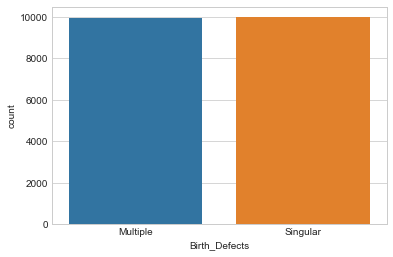

In [1525]:
sns.countplot(df_train['Birth_Defects']);
unistats(df_train[['Birth_Defects']])

In [1526]:
df_train["Birth_Defects"].fillna(df_train["Birth_Defects"].mode()[0], inplace=True)

In [1527]:
unistats(df_test[['Birth_Defects']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Birth_Defects,9465,0,3,object,False,Singular,-,-,-,-,-,-,-,-,-


In [1528]:
df_test['Birth_Defects'].value_counts()

Singular    3713
Multiple    3657
-99         2095
Name: Birth_Defects, dtype: int64

In [1529]:
df_test["Birth_Defects"].replace('-99',df_train["Birth_Defects"].mode()[0], inplace = True)

### Birth Asphyxia

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Birth_Asphyxia,19944,2139,4,object,False,Yes,-,-,-,-,-,-,-,-,-


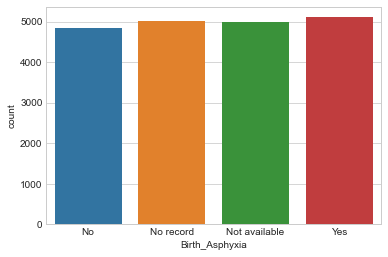

In [1530]:
sns.countplot(df_train['Birth_Asphyxia']);
unistats(df_train[['Birth_Asphyxia']])

In [1531]:
df_train["Birth_Asphyxia"].replace('Not available','No record', inplace = True)
df_train["Birth_Asphyxia"].fillna(df_train["Birth_Asphyxia"].mode()[0], inplace=True)

In [1532]:
unistats(df_test[['Birth_Asphyxia']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Birth_Asphyxia,9465,0,5,object,False,-99,-,-,-,-,-,-,-,-,-


In [1533]:
df_test['Birth_Asphyxia'].value_counts()

-99              2079
Yes              1895
No               1872
No record        1853
Not available    1766
Name: Birth_Asphyxia, dtype: int64

In [1534]:
df_test["Birth_Asphyxia"].replace('-99','No record', inplace = True)
df_test["Birth_Asphyxia"].replace('Not available','No record', inplace = True)
df_test["Birth_Asphyxia"].fillna(df_train["Birth_Asphyxia"].mode()[0], inplace=True)

In [1535]:
df_test['Birth_Asphyxia'].value_counts()

No record    5698
Yes          1895
No           1872
Name: Birth_Asphyxia, dtype: int64

### History of anomalies in previous pregnancies

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
History_Previous_Pregnancies,19911,2172,2,object,False,Yes,-,-,-,-,-,-,-,-,-


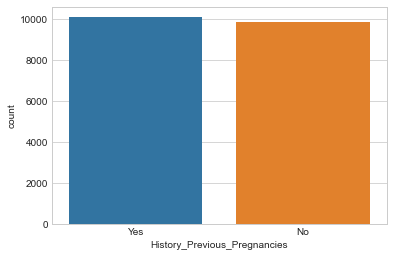

In [1536]:
sns.countplot(df_train['History_Previous_Pregnancies']);
unistats(df_train[['History_Previous_Pregnancies']])

In [1537]:
df_train["History_Previous_Pregnancies"].fillna(df_train["History_Previous_Pregnancies"].mode()[0], inplace=True)

In [1538]:
unistats(df_test[['History_Previous_Pregnancies']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
History_Previous_Pregnancies,9465,0,3,object,False,No,-,-,-,-,-,-,-,-,-


In [1539]:
df_test['History_Previous_Pregnancies'].value_counts()

No     3686
Yes    3682
-99    2097
Name: History_Previous_Pregnancies, dtype: int64

In [1540]:
df_test["History_Previous_Pregnancies"].replace('-99',df_train["History_Previous_Pregnancies"].mode()[0], inplace = True)

In [1541]:
df_test['History_Previous_Pregnancies'].value_counts()

Yes    5779
No     3686
Name: History_Previous_Pregnancies, dtype: int64

### Respiratory Rate (breaths/min)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Respiratory_Rate_Breaths_Min,19934,2149,2,object,False,Normal (30-60),-,-,-,-,-,-,-,-,-


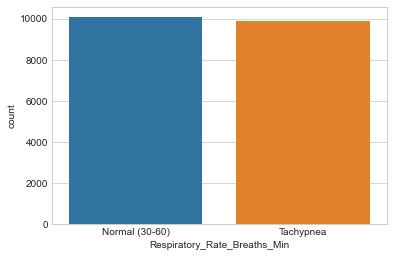

In [1542]:
sns.countplot(df_train['Respiratory_Rate_Breaths_Min']);
unistats(df_train[['Respiratory_Rate_Breaths_Min']])

In [1543]:
df_train["Respiratory_Rate_Breaths_Min"].fillna(df_train["Respiratory_Rate_Breaths_Min"].mode()[0], inplace=True)

In [1544]:
unistats(df_test[['Respiratory_Rate_Breaths_Min']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Respiratory_Rate_Breaths_Min,6579,2886,3,object,False,Normal (30-60),-,-,-,-,-,-,-,-,-


In [1545]:
df_test['Respiratory_Rate_Breaths_Min'].value_counts()

Normal (30-60)    2263
Tachypnea         2211
-99               2105
Name: Respiratory_Rate_Breaths_Min, dtype: int64

In [1546]:
df_test["Respiratory_Rate_Breaths_Min"].replace('-99',df_train["Respiratory_Rate_Breaths_Min"].mode()[0], inplace = True)
df_test["Respiratory_Rate_Breaths_Min"].fillna(df_train["Respiratory_Rate_Breaths_Min"].mode()[0], inplace=True)

In [1547]:
df_test['Respiratory_Rate_Breaths_Min'].value_counts()

Normal (30-60)    7254
Tachypnea         2211
Name: Respiratory_Rate_Breaths_Min, dtype: int64

### Birth Asphyxia

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Autopsy_Birth_Defect,21057,1026,4,object,False,Not applicable,-,-,-,-,-,-,-,-,-


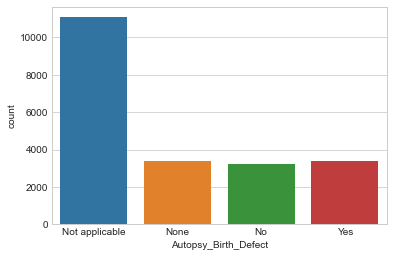

In [1548]:
sns.countplot(df_train['Autopsy_Birth_Defect']);
unistats(df_train[['Autopsy_Birth_Defect']])

In [1549]:
df_train["Autopsy_Birth_Defect"].replace('None',df_train["Autopsy_Birth_Defect"].mode()[0], inplace = True)
df_train["Autopsy_Birth_Defect"].fillna(df_train["Autopsy_Birth_Defect"].mode()[0], inplace=True)

In [1550]:
unistats(df_test[['Autopsy_Birth_Defect']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Autopsy_Birth_Defect,9465,0,5,object,False,Not applicable,-,-,-,-,-,-,-,-,-


In [1551]:
df_test['Autopsy_Birth_Defect'].value_counts()

Not applicable    4732
No                1241
Yes               1229
None              1200
-99               1063
Name: Autopsy_Birth_Defect, dtype: int64

In [1552]:
df_test["Autopsy_Birth_Defect"].replace('-99',df_train["Autopsy_Birth_Defect"].mode()[0], inplace = True)
df_test["Autopsy_Birth_Defect"].replace('None',df_train["Autopsy_Birth_Defect"].mode()[0], inplace = True)
df_test["Autopsy_Birth_Defect"].fillna(df_train["Autopsy_Birth_Defect"].mode()[0], inplace=True)

In [1553]:
df_test['Autopsy_Birth_Defect'].value_counts()

Not applicable    6995
No                1241
Yes               1229
Name: Autopsy_Birth_Defect, dtype: int64

### Folic Acid details

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Folic_Acid,19966,2117,2,object,False,Yes,-,-,-,-,-,-,-,-,-


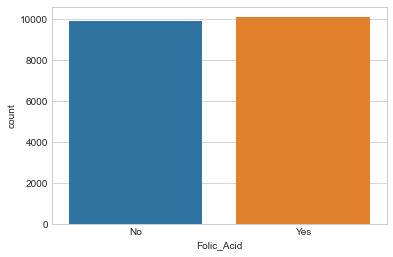

In [1554]:
sns.countplot(df_train['Folic_Acid']);
unistats(df_train[['Folic_Acid']])

In [1555]:
df_train["Folic_Acid"].fillna(df_train["Folic_Acid"].mode()[0], inplace=True)

In [1556]:
unistats(df_test[['Folic_Acid']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Folic_Acid,9465,0,3,object,False,No,-,-,-,-,-,-,-,-,-


In [1557]:
df_test['Folic_Acid'].value_counts()

No     3787
Yes    3586
-99    2092
Name: Folic_Acid, dtype: int64

In [1558]:
df_test["Folic_Acid"].replace('-99',df_train["Folic_Acid"].mode()[0], inplace = True)
df_test["Folic_Acid"].fillna(df_train["Folic_Acid"].mode()[0], inplace=True)

In [1559]:
df_test['Folic_Acid'].value_counts()

Yes    5678
No     3787
Name: Folic_Acid, dtype: int64

### Heart_Rates_Min

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Heart_Rates_Min,19970,2113,2,object,False,Normal,-,-,-,-,-,-,-,-,-


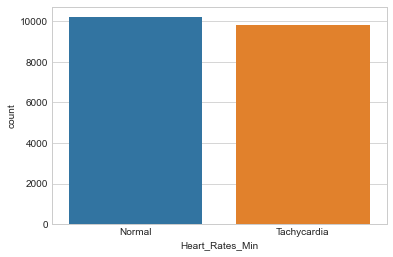

In [1560]:
sns.countplot(df_train['Heart_Rates_Min']);
unistats(df_train[['Heart_Rates_Min']])

In [1561]:
df_train["Heart_Rates_Min"].fillna(df_train["Heart_Rates_Min"].mode()[0], inplace=True)

In [1562]:
unistats(df_test[['Heart_Rates_Min']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Heart_Rates_Min,6565,2900,3,object,False,Tachycardia,-,-,-,-,-,-,-,-,-


In [1563]:
df_test['Heart_Rates_Min'].value_counts()

Tachycardia    2270
Normal         2221
-99            2074
Name: Heart_Rates_Min, dtype: int64

In [1564]:
df_test["Heart_Rates_Min"].replace('-99',df_train["Heart_Rates_Min"].mode()[0], inplace = True)
df_test["Heart_Rates_Min"].fillna(df_train["Heart_Rates_Min"].mode()[0], inplace=True)

In [1565]:
df_test['Heart_Rates_Min'].value_counts()

Normal         7195
Tachycardia    2270
Name: Heart_Rates_Min, dtype: int64

### Gender

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Gender,19910,2173,3,object,False,Ambiguous,-,-,-,-,-,-,-,-,-


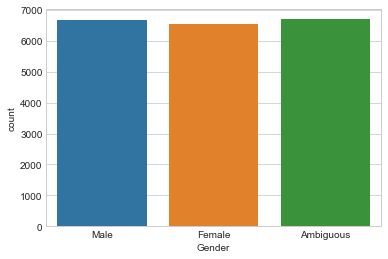

In [1566]:
sns.countplot(df_train['Gender']);
unistats(df_train[['Gender']])

In [1567]:
df_train["Gender"].fillna(df_train["Gender"].mode()[0], inplace=True)

In [1568]:
unistats(df_test[['Gender']])

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Gender,9465,0,4,object,False,Ambiguous,-,-,-,-,-,-,-,-,-


In [1569]:
df_test['Gender'].value_counts()

Ambiguous    2476
Female       2459
Male         2428
-99          2102
Name: Gender, dtype: int64

In [1570]:
df_test["Gender"].replace('-99',df_train["Gender"].mode()[0], inplace = True)

In [1571]:
df_test['Gender'].value_counts()

Ambiguous    4578
Female       2459
Male         2428
Name: Gender, dtype: int64

### Disorder_Subclass

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Disorder_Subclass,19915,2168,9,object,False,Leigh syndrome,-,-,-,-,-,-,-,-,-


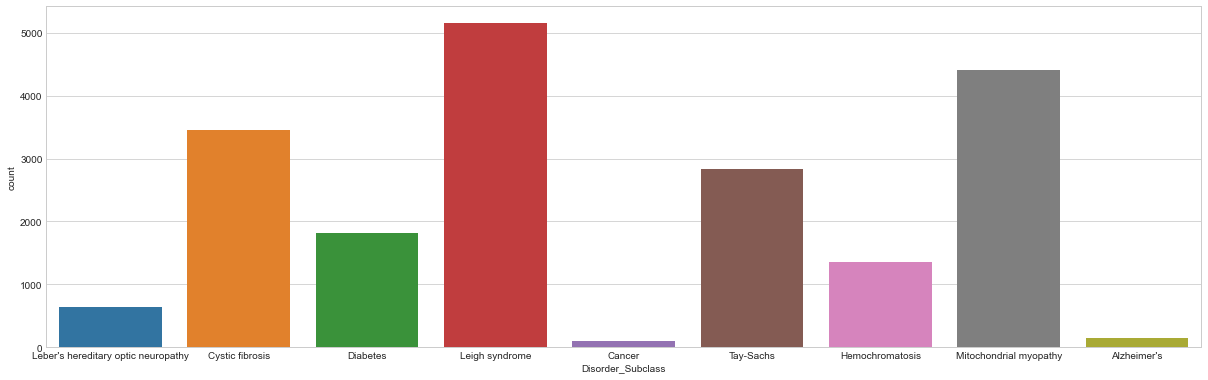

In [1572]:
dims = (20.7, 6.27)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(df_train['Disorder_Subclass'],ax=ax);
unistats(df_train[['Disorder_Subclass']])

In [1573]:
df_train.dropna(subset = ['Disorder_Subclass'], inplace=True)
df_train.dropna(subset = ['Patient_Age'], inplace=True)

In [1574]:
unistats(df_train)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Father_Age,18672,0,45,float64,True,41.00000,41.69719,20.00000,34.00000,41.00000,50.00000,64.00000,11.33152,0.06321,-0.63143
Mother_Age,18672,0,34,float64,True,34.00000,34.41404,18.00000,29.00000,34.00000,40.00000,51.00000,8.50128,0.04134,-0.61531
Patient_Age,18672,0,15,float64,True,4.00000,6.94944,0.00000,3.00000,7.00000,11.00000,14.00000,4.31533,0.01582,-1.21261
Blood_Cell_mcL,18672,0,18672,float64,True,4.09273,4.89881,4.09273,4.76282,4.89955,5.03362,5.60983,0.19957,0.01394,-0.05660
White_Blood_Cell,18672,0,14723,float64,True,7.48622,7.48088,3.00000,5.63129,7.48622,9.28023,12.00000,2.52930,0.01225,-0.77065
Previous_Abortion,18672,0,5,float64,True,2.00000,2.04338,0.00000,1.00000,2.00000,3.00000,4.00000,1.36018,-0.07593,-1.18591
Disorder_Subclass,18672,0,9,object,False,Leigh syndrome,-,-,-,-,-,-,-,-,-
Blood_Test_Result,18672,0,4,object,False,slightly abnormal,-,-,-,-,-,-,-,-,-
Gender,18672,0,3,object,False,Ambiguous,-,-,-,-,-,-,-,-,-
Birth_Asphyxia,18672,0,3,object,False,No record,-,-,-,-,-,-,-,-,-


In [1575]:
df_train=df_train.astype({"Father_Age": 'int64',"Mother_Age": 'int64',"Patient_Age": 'int64',"Previous_Abortion": 'int64'})
df_test=df_test.astype({"Father_Age": 'int64',"Mother_Age": 'int64',"Patient_Age": 'int64',"Previous_Abortion": 'int64'})

In [1576]:
target_col = ["Disorder_Subclass"]
cat_columns   = df_train.nunique()[df_train.nunique() < 12].keys().tolist()
cat_columns   = [x for x in cat_columns ]
print('Categorial Variables')
print(cat_columns)
#numerical columns
num_columns   = [x for x in df_train.columns if x not in cat_columns + target_col]
#Binary columns with 2 values
print('Numeric Variables')
print(num_columns)


Categorial Variables
['Genes_Mother_Side', 'Inherited_from_Father', 'Maternal_Gene', 'Paternal_Gene', 'Status', 'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min', 'Follow_Up', 'Gender', 'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Place_Birth', 'Folic_Acid', 'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception', 'History_Previous_Pregnancies', 'Previous_Abortion', 'Birth_Defects', 'Blood_Test_Result', 'Genetic_Disorder', 'Disorder_Subclass']
Numeric Variables
['Patient_Age', 'Blood_Cell_mcL', 'Mother_Age', 'Father_Age', 'White_Blood_Cell']


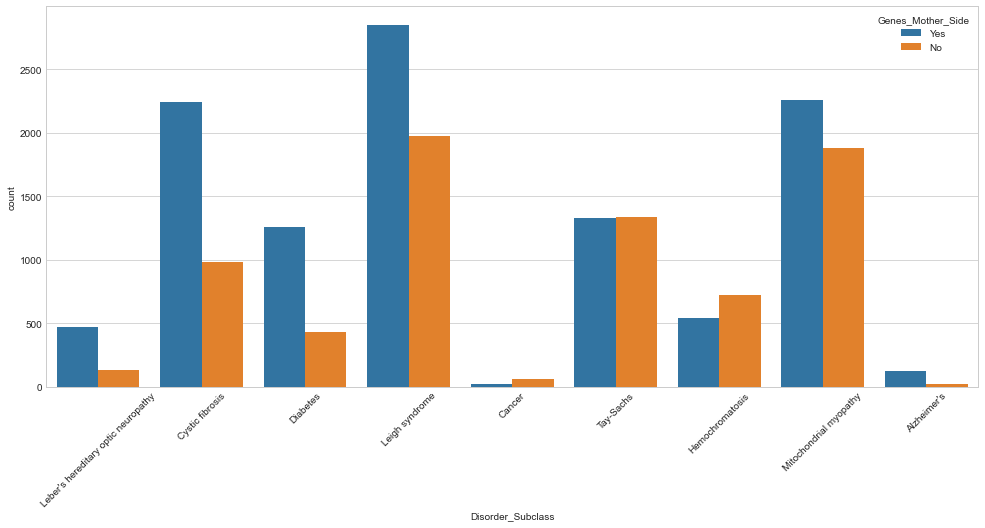

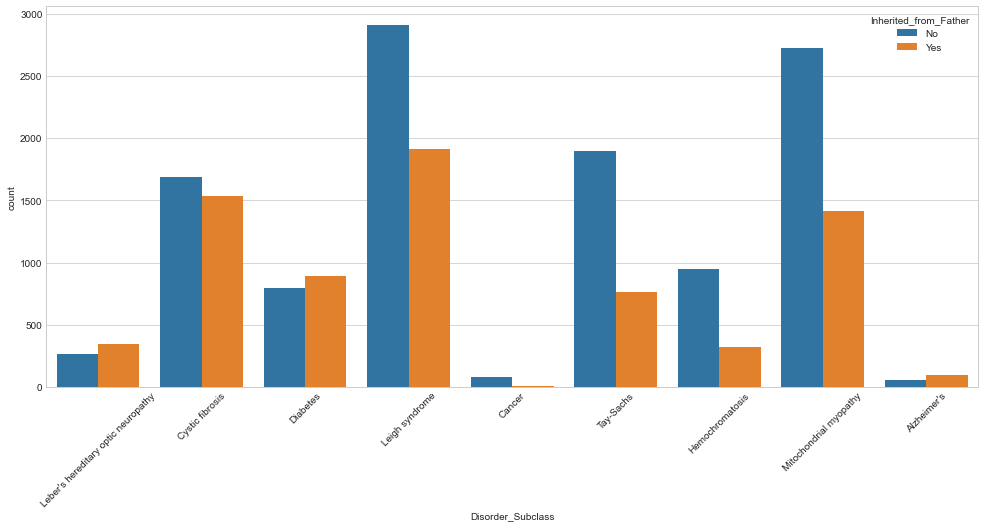

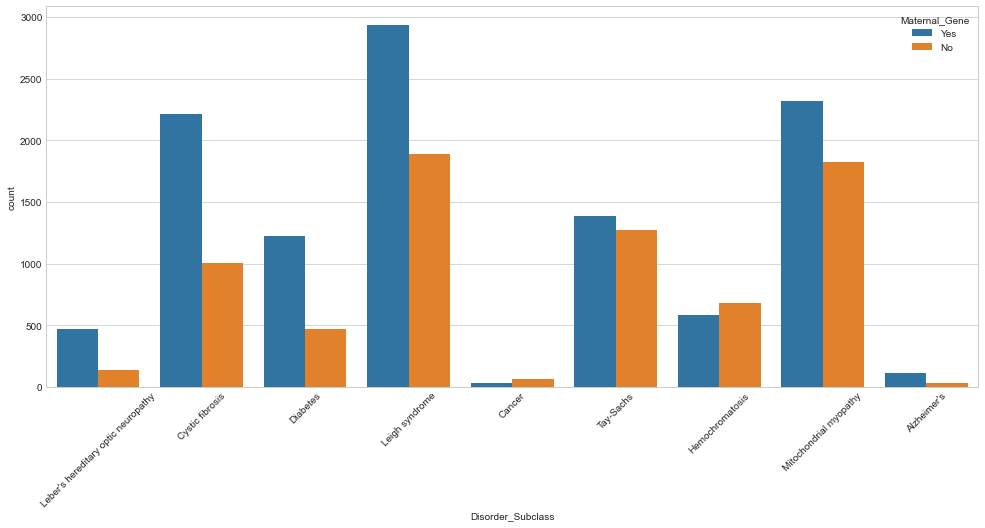

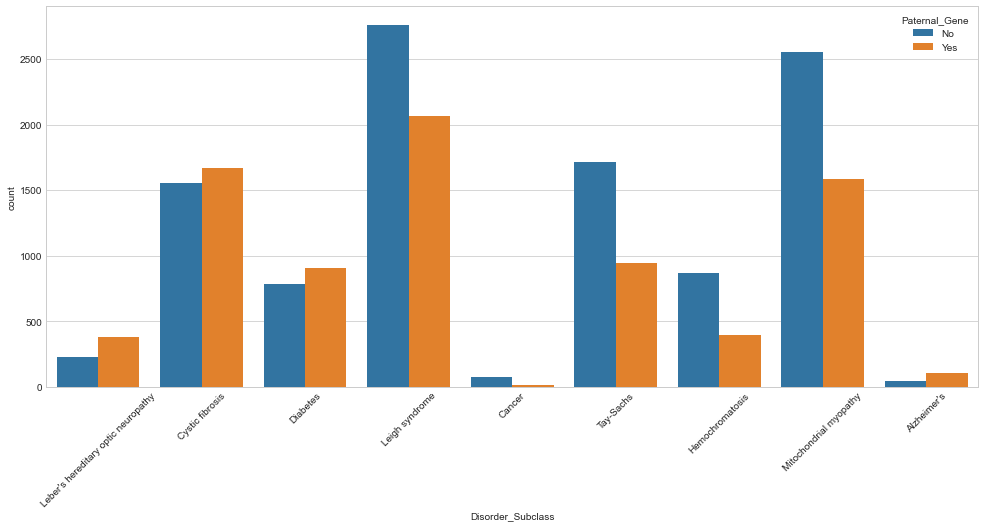

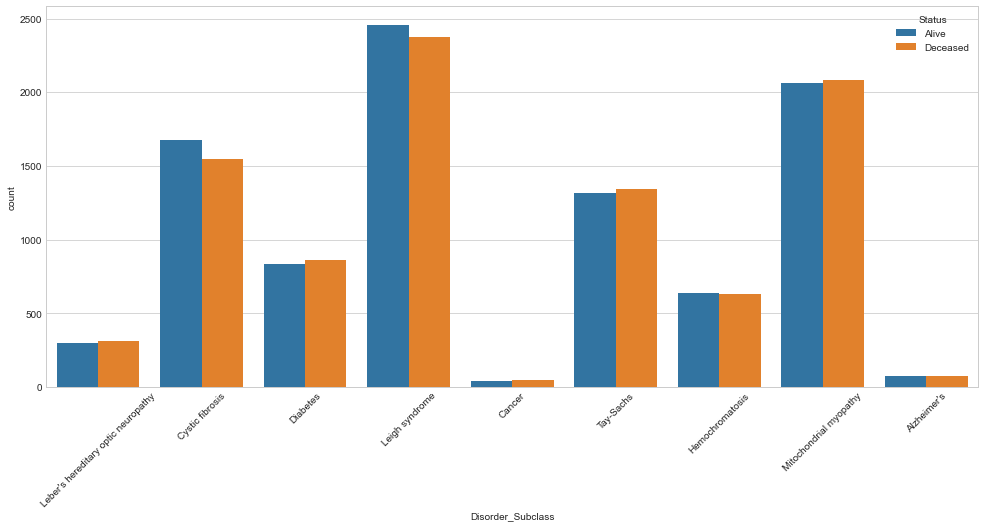

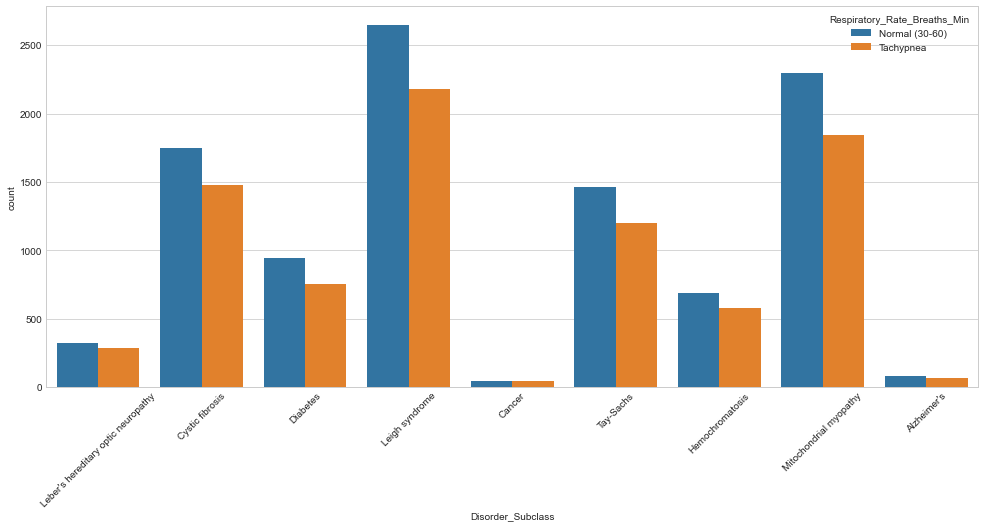

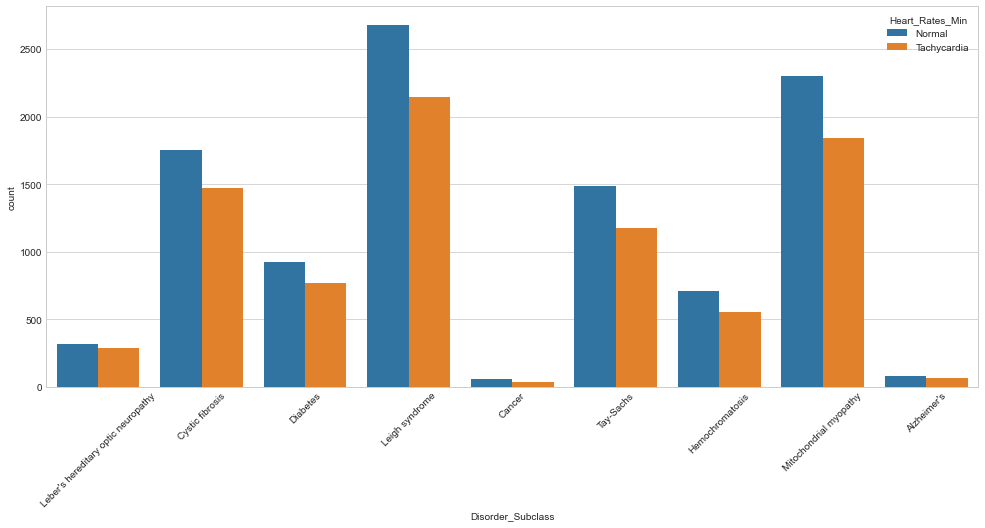

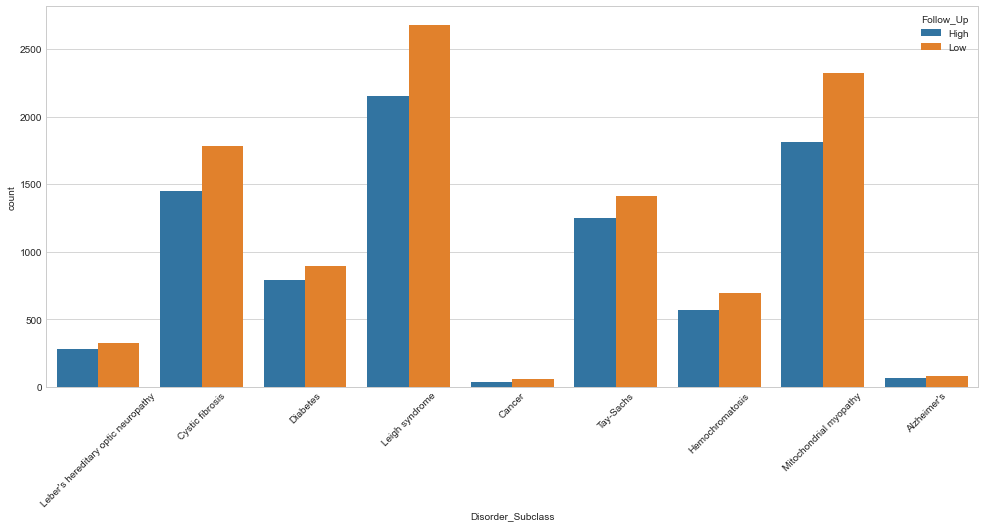

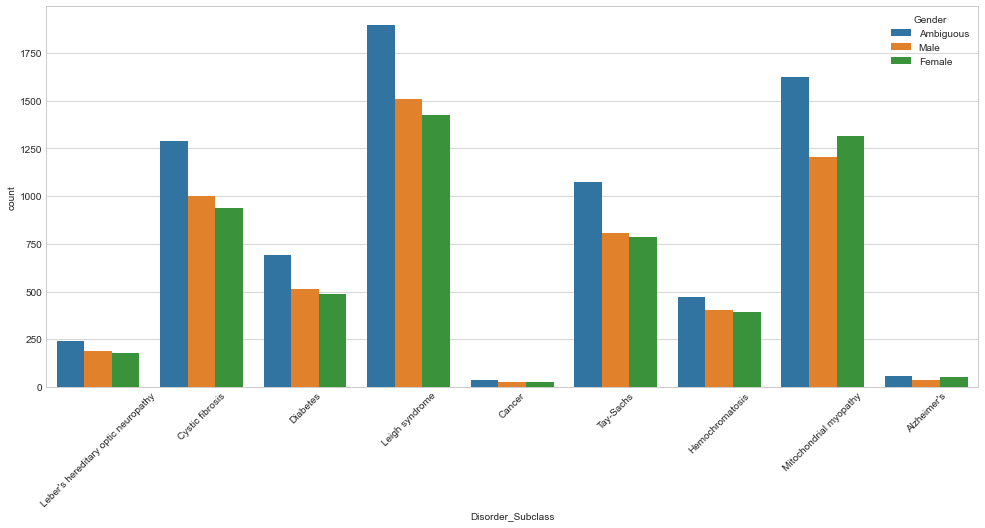

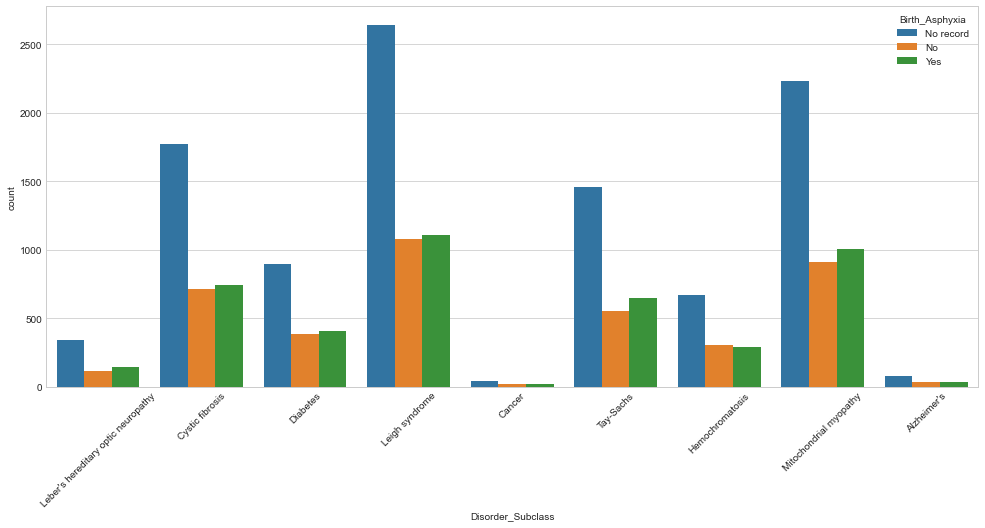

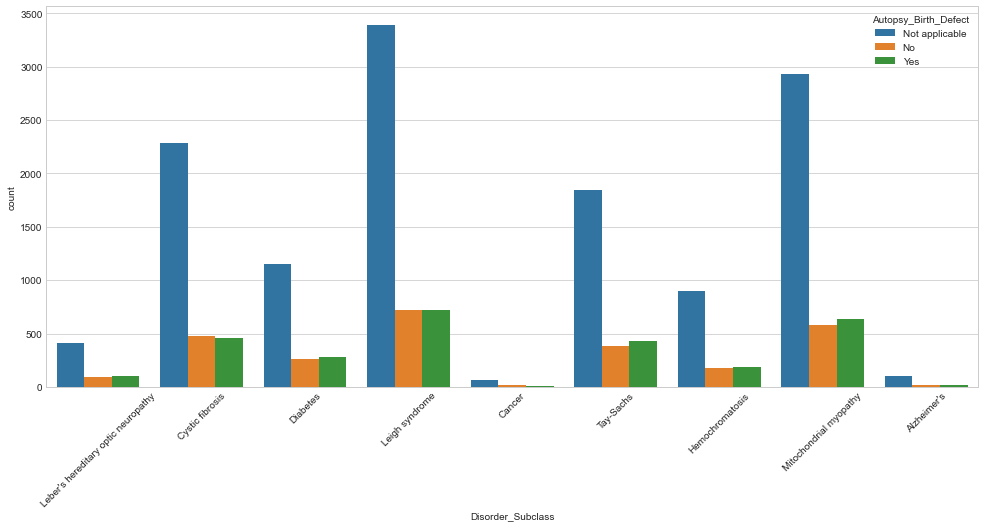

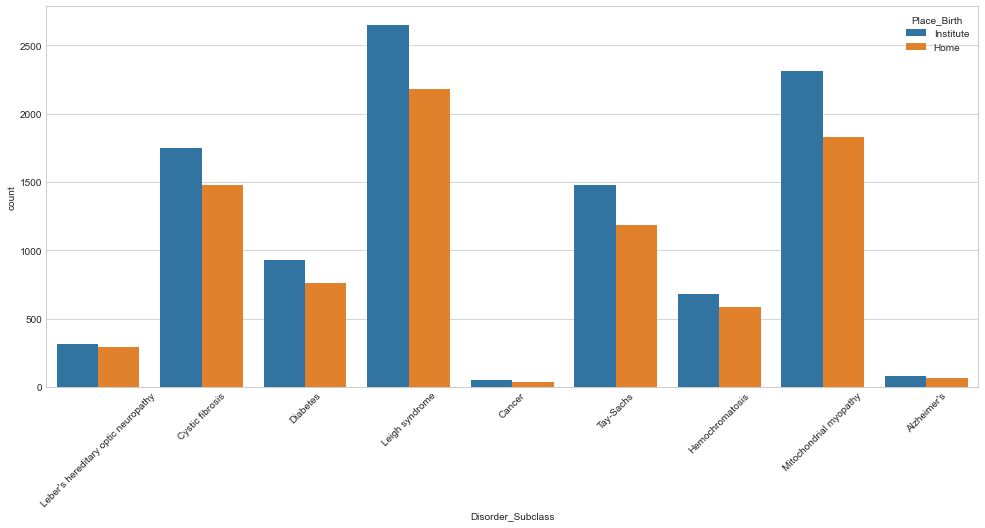

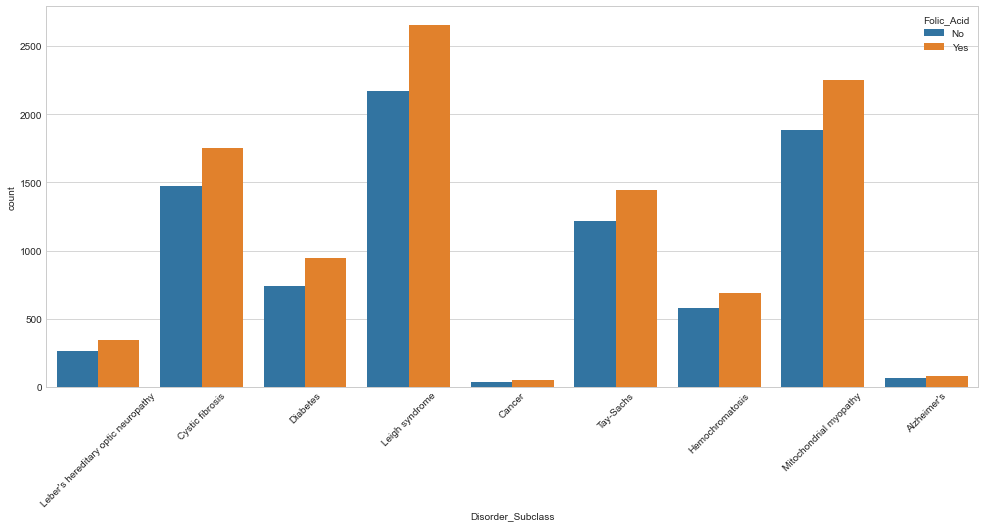

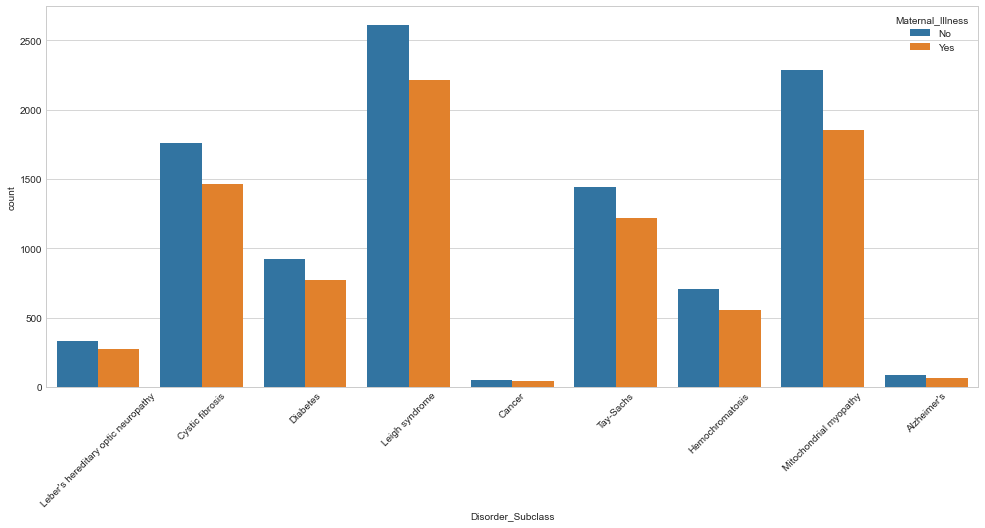

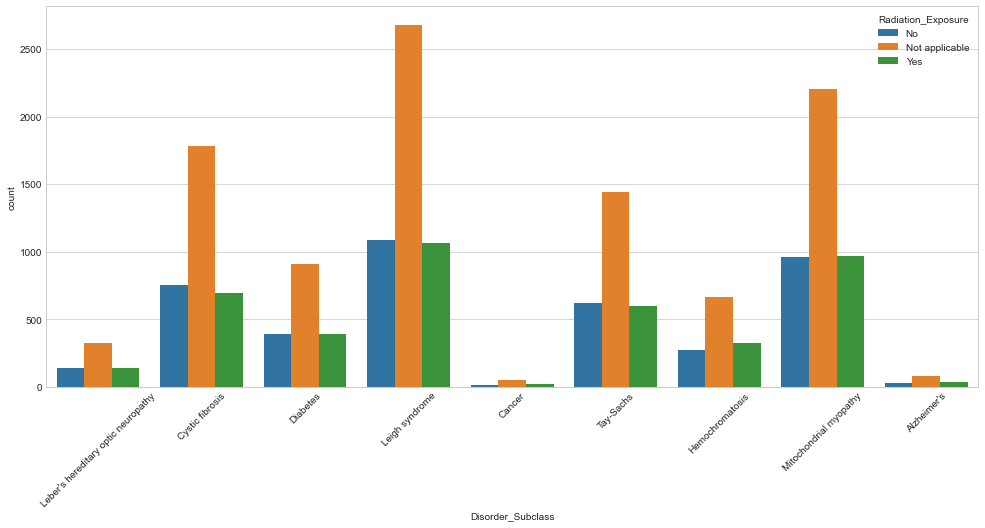

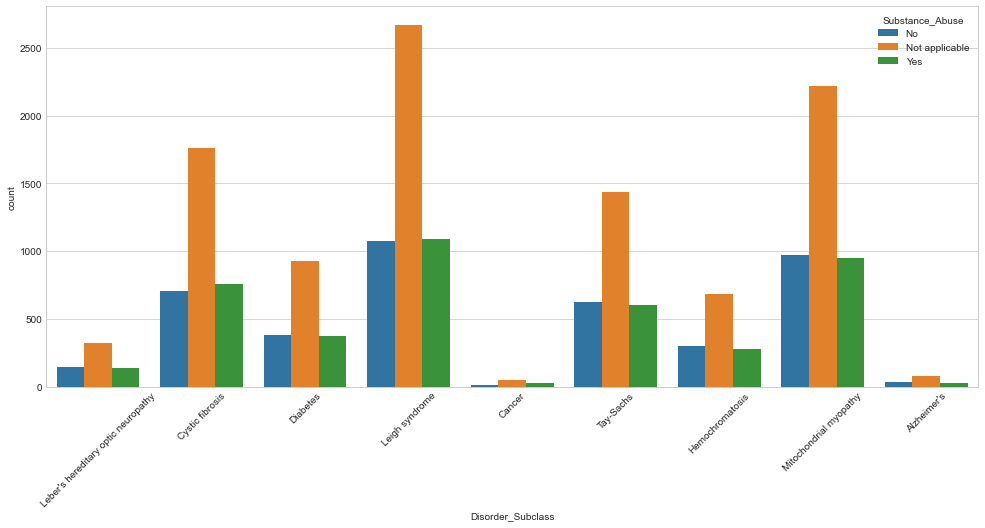

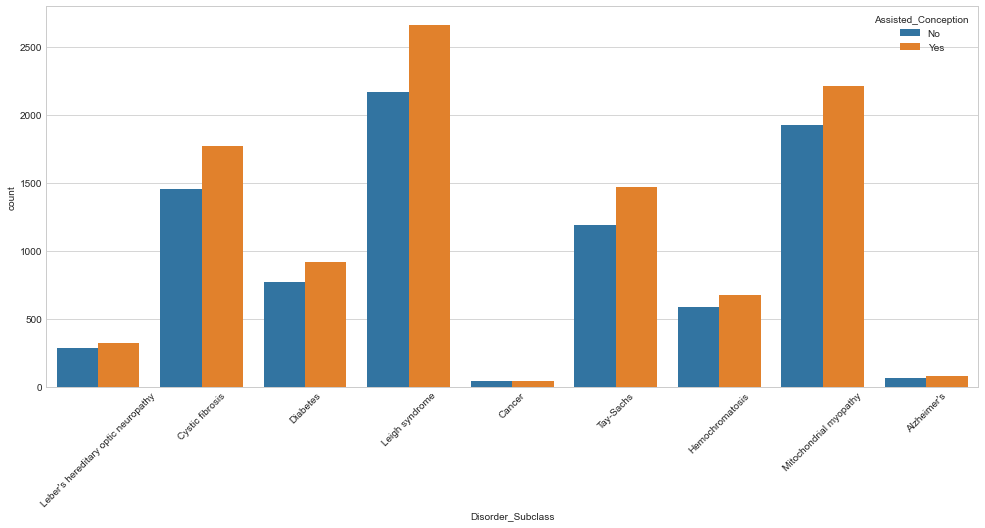

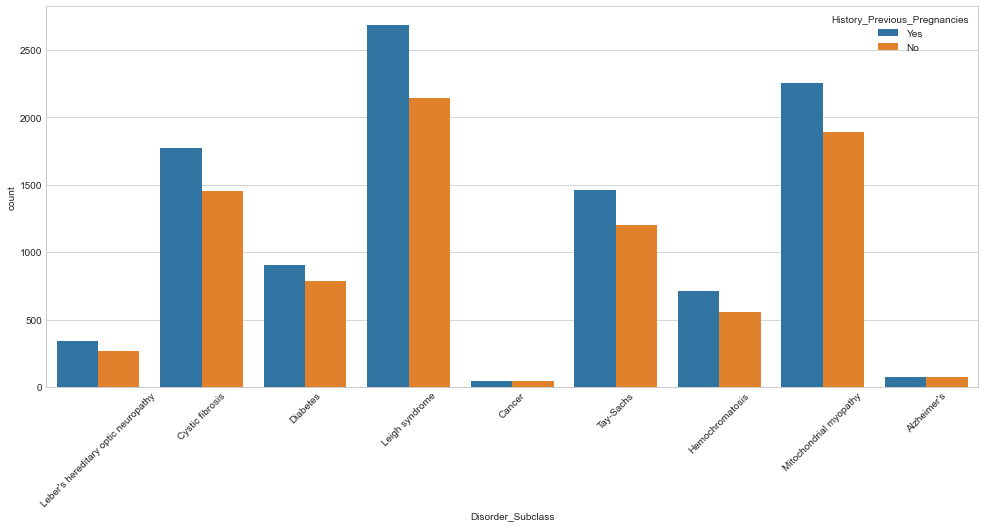

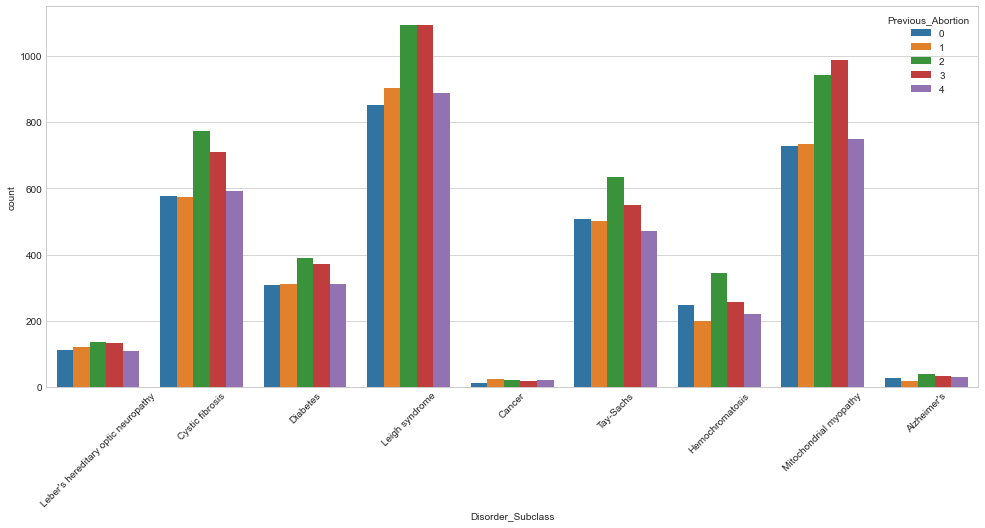

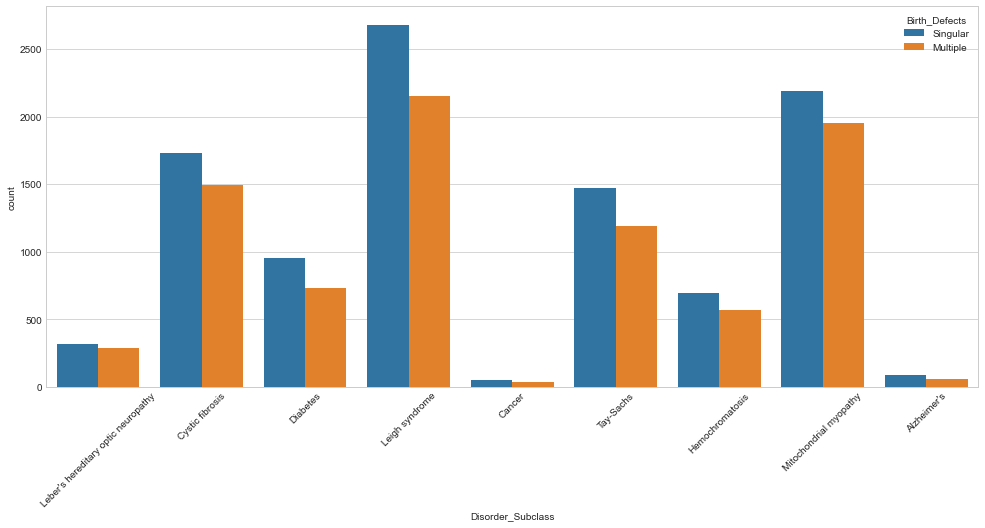

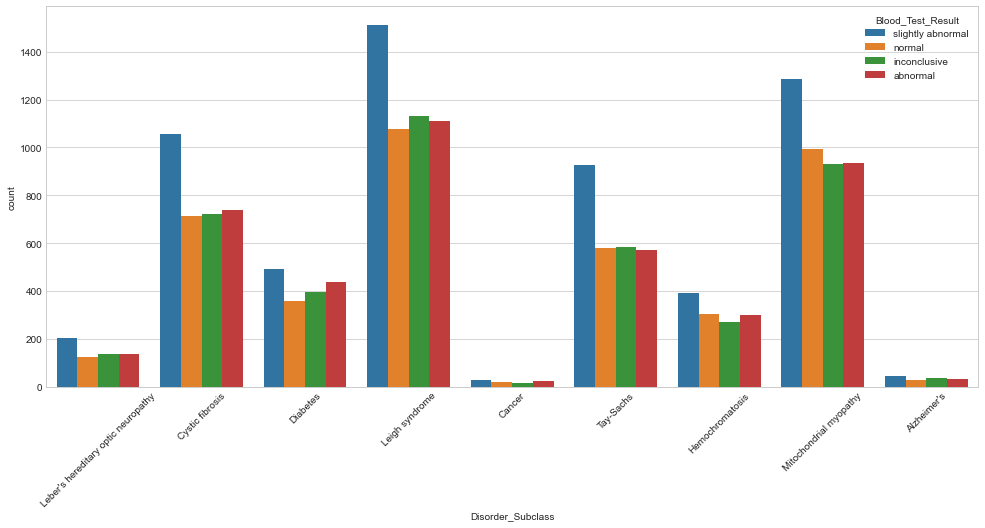

In [1577]:
for i in cat_columns:
    if i not in ('Disorder_Subclass','Genetic_Disorder'):
        dims = (16.7, 7)
        fig, ax = plt.subplots(figsize=dims)
        sns.countplot(df_train['Disorder_Subclass'], hue=df_train[i], ax=ax)
        plt.xticks(rotation=45)
        plt.ticklabel_format(style='plain', axis='y')
        plt.show()

In [1578]:
#Create a Pandas Profiling report to get a quick grasp of the data
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')

reporteEdadfinal = pp.ProfileReport(df_train)
reporteEdadfinal.to_file("processed_data/AnalysisCleanData.html")    

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [1579]:
df_train.to_csv("processed_data/df_train_pr.csv",index=False)
df_test.to_csv("processed_data/df_test_pr.csv",index=False)